In [1]:
pip install requests tqdm pycountry


Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests

username = "siddharthrajput255".lower()
url = f"https://api.chess.com/pub/player/{username}/games/archives"

headers = {
    "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36"
}

resp = requests.get(url, headers=headers)

print("Status code:", resp.status_code)
print("First 200 chars of response:\n", resp.text[:200])

if resp.status_code == 200:
    data = resp.json()
    print("Keys in JSON:", data.keys())


Status code: 200
First 200 chars of response:
 {"archives":["https://api.chess.com/pub/player/siddharthrajput255/games/2023/04","https://api.chess.com/pub/player/siddharthrajput255/games/2023/06","https://api.chess.com/pub/player/siddharthrajput25
Keys in JSON: dict_keys(['archives'])


In [3]:
import pandas as pd
import requests

username = "siddharthrajput255"
url = f"https://api.chess.com/pub/player/{username}/games/archives"

headers = {"User-Agent": "Mozilla/5.0"}
resp = requests.get(url, headers=headers)
data = resp.json()

def get_games(archive_url):
    r = requests.get(archive_url, headers=headers)
    if r.status_code == 200:
        return r.json().get("games", [])
    else:
        return []

all_games = []

for link in data["archives"]:
    games = get_games(link)
    all_games.extend(games)

print("Total games downloaded:", len(all_games))


df = pd.json_normalize(all_games)
df.to_csv("my_chess_games.csv", index=False)

df.head()


Total games downloaded: 6542


,url,pgn,time_control,end_time,rated,tcn,uuid,initial_setup,fen,time_class,...,white.uuid,black.rating,black.result,black.@id,black.username,black.uuid,accuracies.white,accuracies.black,tournament,start_time
0,https://www.chess.com/game/live/75626509705,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",120+1,1681887799,True,lB!TkA2UcM92bs8!muZRgv5ZftYIdrIBvBWOiy45sJTJAJ...,cf4fa79d-de7f-11ed-96c2-6cfe544c0428,rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w ...,1r4k1/1p5p/B2p2p1/3P2q1/PQ1P1p2/5P1b/1P3P2/4R1...,bullet,...,ba3b4054-de7f-11ed-a929-fd4262fa0329,1647,win,https://api.chess.com/pub/player/bginlr1,bginlr1,d3d40968-c4f7-11eb-b653-47a5fd8b2290,NaN,NaN,NaN,NaN
1,https://www.chess.com/game/live/75626973731,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",120+1,1681887987,True,mC0SlBZJCJSJkAJAbs9zfA!Tgm8!egWOiqXHA191qz6XmD...,4c3e8898-de80-11ed-96c2-6cfe544c0428,rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w ...,r1q3k1/1bp2rpp/p1n2n2/1pN3B1/1P1P4/2N5/1P3PPP/...,bullet,...,d3d40968-c4f7-11eb-b653-47a5fd8b2290,1383,abandoned,https://api.chess.com/pub/player/siddharthrajp...,siddharthrajput255,ba3b4054-de7f-11ed-a929-fd4262fa0329,NaN,NaN,NaN,NaN
2,https://www.chess.com/game/live/79432843319,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",180+2,1685694128,True,mC!Tlt0Kbs9zgv5QvKQKtBTCclCldlKQiqzsls8!BJ98ed...,edebb221-011d-11ee-8d03-6cfe544c0428,rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w ...,r1b1r1k1/pp4pp/5p2/4p3/2p3P1/P7/2P4P/R2KR3 w - -,blitz,...,ba3b4054-de7f-11ed-a929-fd4262fa0329,1390,win,https://api.chess.com/pub/player/raghuram1708,Raghuram1708,c1ec05d8-905f-11eb-bca1-511c1b84746c,NaN,NaN,NaN,NaN
3,https://www.chess.com/game/live/79436507095,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",180+2,1685697878,True,mC0KgvZRpx5QfH!TltWOHQXQcMQIkA3VMF6Xbs76dyYQjz...,af804d1a-0126-11ee-8d03-6cfe544c0428,rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w ...,r1q1k2r/5pb1/p1pN3p/8/QPP1p3/3P1N1P/P4PP1/R3K2...,blitz,...,f6a07c38-f021-11eb-9802-dfdfd960f36d,1116,resigned,https://api.chess.com/pub/player/siddharthrajp...,siddharthrajput255,ba3b4054-de7f-11ed-a929-fd4262fa0329,NaN,NaN,NaN,NaN
4,https://www.chess.com/game/live/79463450755,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",180+2,1685724732,True,mC0KgvZJCJ7JbsJGfA5Qeg9IvM!Vfe8!Mv6Elt98cV2VA1...,f5561273-0164-11ee-8d03-6cfe544c0428,rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w ...,r7/pp1Nn3/3Rk3/2P4Q/8/8/1qP2PPP/6K1 b - -,blitz,...,9291aefc-812b-11eb-86f2-a9ca9ef5837b,1032,checkmated,https://api.chess.com/pub/player/siddharthrajp...,siddharthrajput255,ba3b4054-de7f-11ed-a929-fd4262fa0329,58.38,39.59,NaN,NaN


In [4]:
import pandas as pd


clean_df = df.copy()


clean_df = clean_df.copy()
clean_df.columns = clean_df.columns.str.replace(r'[^a-zA-Z0-9_.]', '', regex=True)


for col in ['accuracies.white', 'accuracies.black']:
    if col in clean_df.columns:
        clean_df[col] = pd.to_numeric(clean_df[col], errors='coerce')


if 'end_time' in clean_df.columns:
    clean_df['end_time'] = pd.to_datetime(clean_df['end_time'], unit='s', errors='coerce')
if 'start_time' in clean_df.columns:
    clean_df['start_time'] = pd.to_datetime(clean_df['start_time'], unit='s', errors='coerce')


if 'winner' in clean_df.columns:
    clean_df['winner'] = clean_df['winner'].fillna('draw')


clean_df = clean_df.drop_duplicates()


clean_df = clean_df.reset_index(drop=True)

clean_df.head()


,url,pgn,time_control,end_time,rated,tcn,uuid,initial_setup,fen,time_class,...,white.uuid,black.rating,black.result,black.id,black.username,black.uuid,accuracies.white,accuracies.black,tournament,start_time
0,https://www.chess.com/game/live/75626509705,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",120+1,2023-04-19 07:03:19,True,lB!TkA2UcM92bs8!muZRgv5ZftYIdrIBvBWOiy45sJTJAJ...,cf4fa79d-de7f-11ed-96c2-6cfe544c0428,rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w ...,1r4k1/1p5p/B2p2p1/3P2q1/PQ1P1p2/5P1b/1P3P2/4R1...,bullet,...,ba3b4054-de7f-11ed-a929-fd4262fa0329,1647,win,https://api.chess.com/pub/player/bginlr1,bginlr1,d3d40968-c4f7-11eb-b653-47a5fd8b2290,NaN,NaN,NaN,NaT
1,https://www.chess.com/game/live/75626973731,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",120+1,2023-04-19 07:06:27,True,mC0SlBZJCJSJkAJAbs9zfA!Tgm8!egWOiqXHA191qz6XmD...,4c3e8898-de80-11ed-96c2-6cfe544c0428,rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w ...,r1q3k1/1bp2rpp/p1n2n2/1pN3B1/1P1P4/2N5/1P3PPP/...,bullet,...,d3d40968-c4f7-11eb-b653-47a5fd8b2290,1383,abandoned,https://api.chess.com/pub/player/siddharthrajp...,siddharthrajput255,ba3b4054-de7f-11ed-a929-fd4262fa0329,NaN,NaN,NaN,NaT
2,https://www.chess.com/game/live/79432843319,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",180+2,2023-06-02 08:22:08,True,mC!Tlt0Kbs9zgv5QvKQKtBTCclCldlKQiqzsls8!BJ98ed...,edebb221-011d-11ee-8d03-6cfe544c0428,rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w ...,r1b1r1k1/pp4pp/5p2/4p3/2p3P1/P7/2P4P/R2KR3 w - -,blitz,...,ba3b4054-de7f-11ed-a929-fd4262fa0329,1390,win,https://api.chess.com/pub/player/raghuram1708,Raghuram1708,c1ec05d8-905f-11eb-bca1-511c1b84746c,NaN,NaN,NaN,NaT
3,https://www.chess.com/game/live/79436507095,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",180+2,2023-06-02 09:24:38,True,mC0KgvZRpx5QfH!TltWOHQXQcMQIkA3VMF6Xbs76dyYQjz...,af804d1a-0126-11ee-8d03-6cfe544c0428,rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w ...,r1q1k2r/5pb1/p1pN3p/8/QPP1p3/3P1N1P/P4PP1/R3K2...,blitz,...,f6a07c38-f021-11eb-9802-dfdfd960f36d,1116,resigned,https://api.chess.com/pub/player/siddharthrajp...,siddharthrajput255,ba3b4054-de7f-11ed-a929-fd4262fa0329,NaN,NaN,NaN,NaT
4,https://www.chess.com/game/live/79463450755,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",180+2,2023-06-02 16:52:12,True,mC0KgvZJCJ7JbsJGfA5Qeg9IvM!Vfe8!Mv6Elt98cV2VA1...,f5561273-0164-11ee-8d03-6cfe544c0428,rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w ...,r7/pp1Nn3/3Rk3/2P4Q/8/8/1qP2PPP/6K1 b - -,blitz,...,9291aefc-812b-11eb-86f2-a9ca9ef5837b,1032,checkmated,https://api.chess.com/pub/player/siddharthrajp...,siddharthrajput255,ba3b4054-de7f-11ed-a929-fd4262fa0329,58.38,39.59,NaN,NaT


In [5]:
clean_df.describe()

,end_time,white.rating,black.rating,accuracies.white,accuracies.black,start_time
count,6542,6542.000000,6542.000000,573.000000,573.000000,6
mean,2024-04-14 11:06:03.592326656,981.231581,980.649190,70.486003,69.801920,2024-07-04 17:29:17.166666752
min,2023-04-19 07:03:19,100.000000,100.000000,10.230000,13.570000,2023-06-27 16:28:45
25%,2023-10-15 12:38:19,731.000000,731.000000,63.890000,62.840000,2023-08-17 16:53:15.500000
50%,2024-03-03 06:30:16.500000,975.000000,973.000000,71.590000,71.580000,2024-06-13 22:06:10
75%,2024-09-03 14:53:08.750000128,1293.000000,1292.000000,78.650000,78.590000,2025-05-09 19:38:50.249999872
max,2025-09-03 08:32:39,1762.000000,1762.000000,100.000000,100.000000,2025-08-26 18:15:57
std,NaN,321.720279,322.008073,12.346269,13.428379,NaN


In [6]:
clean_df = clean_df.drop(columns=['url', 'tcn', 'uuid', 'initial_setup', 'white.uuid', 'black.id', 'black.uuid', 'tournament', 'start_time'], errors='ignore')

In [7]:
clean_df.head()

,pgn,time_control,end_time,rated,fen,time_class,rules,eco,white.rating,white.result,white.id,white.username,black.rating,black.result,black.username,accuracies.white,accuracies.black
0,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",120+1,2023-04-19 07:03:19,True,1r4k1/1p5p/B2p2p1/3P2q1/PQ1P1p2/5P1b/1P3P2/4R1...,bullet,chess,https://www.chess.com/openings/Kings-Indian-De...,1444,resigned,https://api.chess.com/pub/player/siddharthrajp...,siddharthrajput255,1647,win,bginlr1,NaN,NaN
1,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",120+1,2023-04-19 07:06:27,True,r1q3k1/1bp2rpp/p1n2n2/1pN3B1/1P1P4/2N5/1P3PPP/...,bullet,chess,https://www.chess.com/openings/Queens-Gambit-A...,1652,win,https://api.chess.com/pub/player/bginlr1,bginlr1,1383,abandoned,siddharthrajput255,NaN,NaN
2,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",180+2,2023-06-02 08:22:08,True,r1b1r1k1/pp4pp/5p2/4p3/2p3P1/P7/2P4P/R2KR3 w - -,blitz,chess,https://www.chess.com/openings/Kings-Pawn-Open...,1207,resigned,https://api.chess.com/pub/player/siddharthrajp...,siddharthrajput255,1390,win,Raghuram1708,NaN,NaN
3,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",180+2,2023-06-02 09:24:38,True,r1q1k2r/5pb1/p1pN3p/8/QPP1p3/3P1N1P/P4PP1/R3K2...,blitz,chess,https://www.chess.com/openings/Philidor-Defense,1296,win,https://api.chess.com/pub/player/mhonski,Mhonski,1116,resigned,siddharthrajput255,NaN,NaN
4,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",180+2,2023-06-02 16:52:12,True,r7/pp1Nn3/3Rk3/2P4Q/8/8/1qP2PPP/6K1 b - -,blitz,chess,https://www.chess.com/openings/Kings-Pawn-Open...,1142,win,https://api.chess.com/pub/player/drunkredhead,DrunkRedHead,1032,checkmated,siddharthrajput255,58.38,39.59


In [8]:
print(clean_df.columns)

Index(['pgn', 'time_control', 'end_time', 'rated', 'fen', 'time_class',
       'rules', 'eco', 'white.rating', 'white.result', 'white.id',
       'white.username', 'black.rating', 'black.result', 'black.username',
       'accuracies.white', 'accuracies.black'],
      dtype='object')


In [9]:
clean_df=clean_df.drop(columns=['white.id','rated'],errors='ignore')

In [10]:
clean_df.head()

,pgn,time_control,end_time,fen,time_class,rules,eco,white.rating,white.result,white.username,black.rating,black.result,black.username,accuracies.white,accuracies.black
0,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",120+1,2023-04-19 07:03:19,1r4k1/1p5p/B2p2p1/3P2q1/PQ1P1p2/5P1b/1P3P2/4R1...,bullet,chess,https://www.chess.com/openings/Kings-Indian-De...,1444,resigned,siddharthrajput255,1647,win,bginlr1,NaN,NaN
1,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",120+1,2023-04-19 07:06:27,r1q3k1/1bp2rpp/p1n2n2/1pN3B1/1P1P4/2N5/1P3PPP/...,bullet,chess,https://www.chess.com/openings/Queens-Gambit-A...,1652,win,bginlr1,1383,abandoned,siddharthrajput255,NaN,NaN
2,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",180+2,2023-06-02 08:22:08,r1b1r1k1/pp4pp/5p2/4p3/2p3P1/P7/2P4P/R2KR3 w - -,blitz,chess,https://www.chess.com/openings/Kings-Pawn-Open...,1207,resigned,siddharthrajput255,1390,win,Raghuram1708,NaN,NaN
3,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",180+2,2023-06-02 09:24:38,r1q1k2r/5pb1/p1pN3p/8/QPP1p3/3P1N1P/P4PP1/R3K2...,blitz,chess,https://www.chess.com/openings/Philidor-Defense,1296,win,Mhonski,1116,resigned,siddharthrajput255,NaN,NaN
4,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",180+2,2023-06-02 16:52:12,r7/pp1Nn3/3Rk3/2P4Q/8/8/1qP2PPP/6K1 b - -,blitz,chess,https://www.chess.com/openings/Kings-Pawn-Open...,1142,win,DrunkRedHead,1032,checkmated,siddharthrajput255,58.38,39.59


In [11]:
clean_df["opening_name"] = clean_df["eco"].apply(
    lambda x: " ".join(x.split("/")[-1].split("-")[:-1]) if pd.notnull(x) else "Unknown"
)
clean_df.head()

,pgn,time_control,end_time,fen,time_class,rules,eco,white.rating,white.result,white.username,black.rating,black.result,black.username,accuracies.white,accuracies.black,opening_name
0,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",120+1,2023-04-19 07:03:19,1r4k1/1p5p/B2p2p1/3P2q1/PQ1P1p2/5P1b/1P3P2/4R1...,bullet,chess,https://www.chess.com/openings/Kings-Indian-De...,1444,resigned,siddharthrajput255,1647,win,bginlr1,NaN,NaN,Kings Indian Defense Normal Variation...5.Bg5 ...
1,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",120+1,2023-04-19 07:06:27,r1q3k1/1bp2rpp/p1n2n2/1pN3B1/1P1P4/2N5/1P3PPP/...,bullet,chess,https://www.chess.com/openings/Queens-Gambit-A...,1652,win,bginlr1,1383,abandoned,siddharthrajput255,NaN,NaN,Queens Gambit Accepted Old Variation...5.exd4 ...
2,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",180+2,2023-06-02 08:22:08,r1b1r1k1/pp4pp/5p2/4p3/2p3P1/P7/2P4P/R2KR3 w - -,blitz,chess,https://www.chess.com/openings/Kings-Pawn-Open...,1207,resigned,siddharthrajput255,1390,win,Raghuram1708,NaN,NaN,Kings Pawn Opening Leonardis Variation
3,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",180+2,2023-06-02 09:24:38,r1q1k2r/5pb1/p1pN3p/8/QPP1p3/3P1N1P/P4PP1/R3K2...,blitz,chess,https://www.chess.com/openings/Philidor-Defense,1296,win,Mhonski,1116,resigned,siddharthrajput255,NaN,NaN,Philidor
4,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",180+2,2023-06-02 16:52:12,r7/pp1Nn3/3Rk3/2P4Q/8/8/1qP2PPP/6K1 b - -,blitz,chess,https://www.chess.com/openings/Kings-Pawn-Open...,1142,win,DrunkRedHead,1032,checkmated,siddharthrajput255,58.38,39.59,Kings Pawn Opening Kings Knight


In [12]:
clean_df.tail()

,pgn,time_control,end_time,fen,time_class,rules,eco,white.rating,white.result,white.username,black.rating,black.result,black.username,accuracies.white,accuracies.black,opening_name
6537,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",600,2025-08-31 05:04:03,r1b1r1k1/ppbn1ppp/2pq1n2/3p4/3P1B2/P1N2NP1/1PP...,rapid,chess,https://www.chess.com/openings/French-Defense-...,1345,win,Medvedy1958,1322,resigned,siddharthrajput255,NaN,NaN,French Defense Knight Variation 2...d5 3.exd5
6538,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",600,2025-08-31 05:22:50,2k5/2P5/2R1N3/8/4p1p1/4P1P1/q1K2P2/8 w - - 2 60,rapid,chess,https://www.chess.com/openings/Englund-Gambit,1314,timeout,siddharthrajput255,1327,win,Ararar77,NaN,NaN,Englund
6539,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",600,2025-08-31 05:24:24,rnb1kbnr/p4p1p/1p2p1p1/1Qp1P3/3P4/5N2/PP3PPP/R...,rapid,chess,https://www.chess.com/openings/French-Defense-...,1306,win,arturojj,1306,resigned,siddharthrajput255,NaN,NaN,French Defense Advance Variation
6540,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",600,2025-08-31 05:29:54,r4rk1/1pp2ppp/p7/3pN3/2PPn3/P3P3/3q3P/1K2R3 b ...,rapid,chess,https://www.chess.com/openings/Queens-Gambit-D...,1298,resigned,siddharthrajput255,1313,win,UNyeinMyint,NaN,NaN,Queens Gambit Declined Chigorin Defense
6541,"[Event ""Let's Play!""]\n[Site ""Chess.com""]\n[Da...",1/259200,2025-09-03 08:32:39,rnbqkbnr/ppp2ppp/8/3p4/8/2N2N2/PPPP1PPP/R1BQKB...,daily,chess,https://www.chess.com/openings/French-Defense-...,1394,win,HenryHobuilder,814,timeout,siddharthrajput255,NaN,NaN,French Defense Knight Variation 2...d5 3.exd5


In [13]:
clean_df=clean_df.drop(columns=['pgn','fen','rules'],errors='ignore')


In [14]:
import numpy as np
my_user = "siddharthrajput255"
pdf=clean_df.copy()
pdf['white.username'] = pdf['white.username'].astype(str).str.strip()
pdf['black.username'] = pdf['black.username'].astype(str).str.strip()
w_lower = pdf['white.username'].str.lower()
b_lower = pdf['black.username'].str.lower()
user_lower = my_user.lower()
# my_color: 'white' if user is white, 'black' if user is black, NaN if not in row
pdf['my_color'] = np.where(w_lower == user_lower, 'white',
                  'black')

pdf['my_rating'] = np.where(pdf['my_color'] == 'white', pdf['white.rating'],
                            pdf['black.rating'])

# Opponent username
pdf['opponent_username'] = np.where(pdf['my_color'] == 'white', pdf['black.username'],
                                    pdf['white.username'])

# Opponent rating
pdf['opponent_rating'] = np.where(pdf['my_color'] == 'white', pdf['black.rating'],
                                  pdf['white.rating'])

# Game result
pdf['my_result'] = np.where(pdf['my_color'] == 'white', pdf['white.result'],
                            pdf['black.result'])

# Accuracy
pdf['my_accuracy'] = np.where(pdf['my_color'] == 'white', pdf['accuracies.white'],
                              pdf['accuracies.black'])

pdf['opponent_accuracy'] = np.where(pdf['my_color'] == 'white', pdf['accuracies.black'],
                                    pdf['accuracies.white'])

# Preview
pdf.tail()




,time_control,end_time,time_class,eco,white.rating,white.result,white.username,black.rating,black.result,black.username,accuracies.white,accuracies.black,opening_name,my_color,my_rating,opponent_username,opponent_rating,my_result,my_accuracy,opponent_accuracy
6537,600,2025-08-31 05:04:03,rapid,https://www.chess.com/openings/French-Defense-...,1345,win,Medvedy1958,1322,resigned,siddharthrajput255,NaN,NaN,French Defense Knight Variation 2...d5 3.exd5,black,1322,Medvedy1958,1345,resigned,NaN,NaN
6538,600,2025-08-31 05:22:50,rapid,https://www.chess.com/openings/Englund-Gambit,1314,timeout,siddharthrajput255,1327,win,Ararar77,NaN,NaN,Englund,white,1314,Ararar77,1327,timeout,NaN,NaN
6539,600,2025-08-31 05:24:24,rapid,https://www.chess.com/openings/French-Defense-...,1306,win,arturojj,1306,resigned,siddharthrajput255,NaN,NaN,French Defense Advance Variation,black,1306,arturojj,1306,resigned,NaN,NaN
6540,600,2025-08-31 05:29:54,rapid,https://www.chess.com/openings/Queens-Gambit-D...,1298,resigned,siddharthrajput255,1313,win,UNyeinMyint,NaN,NaN,Queens Gambit Declined Chigorin Defense,white,1298,UNyeinMyint,1313,resigned,NaN,NaN
6541,1/259200,2025-09-03 08:32:39,daily,https://www.chess.com/openings/French-Defense-...,1394,win,HenryHobuilder,814,timeout,siddharthrajput255,NaN,NaN,French Defense Knight Variation 2...d5 3.exd5,black,814,HenryHobuilder,1394,timeout,NaN,NaN


In [15]:
print(pdf.columns)

Index(['time_control', 'end_time', 'time_class', 'eco', 'white.rating',
       'white.result', 'white.username', 'black.rating', 'black.result',
       'black.username', 'accuracies.white', 'accuracies.black',
       'opening_name', 'my_color', 'my_rating', 'opponent_username',
       'opponent_rating', 'my_result', 'my_accuracy', 'opponent_accuracy'],
      dtype='object')


In [16]:
pdf=pdf.drop(columns=['pgn','white.rating', 'white.result','fen', 'white.username', 'black.rating','black.result', 'black.username', 
                      'accuracies.white','accuracies.black'],errors='ignore')

In [18]:
pdf.drop(columns=['eco',],inplace=True)
pdf.head(50)

,time_control,end_time,time_class,opening_name,my_color,my_rating,opponent_username,opponent_rating,my_result,my_accuracy,opponent_accuracy
0,120+1,2023-04-19 07:03:19,bullet,Kings Indian Defense Normal Variation...5.Bg5 ...,white,1444,bginlr1,1647,resigned,NaN,NaN
1,120+1,2023-04-19 07:06:27,bullet,Queens Gambit Accepted Old Variation...5.exd4 ...,black,1383,bginlr1,1652,abandoned,NaN,NaN
2,180+2,2023-06-02 08:22:08,blitz,Kings Pawn Opening Leonardis Variation,white,1207,Raghuram1708,1390,resigned,NaN,NaN
3,180+2,2023-06-02 09:24:38,blitz,Philidor,black,1116,Mhonski,1296,resigned,NaN,NaN
4,180+2,2023-06-02 16:52:12,blitz,Kings Pawn Opening Kings Knight,black,1032,DrunkRedHead,1142,checkmated,39.59,58.38
5,180+2,2023-06-02 16:56:07,blitz,Bishops Opening Boi Variation,black,949,sanderh15,982,resigned,61.52,77.62
6,180+2,2023-06-02 17:03:49,blitz,Sicilian Defense Open,white,897,AlexAmaro19,1075,timeout,NaN,NaN
7,180+2,2023-06-03 17:52:57,blitz,Center Game Accepted Normal,white,842,TBone100,904,resigned,NaN,NaN
8,180+2,2023-06-03 17:55:13,blitz,Center,black,803,TBone100,911,resigned,NaN,NaN
9,180+2,2023-06-03 17:57:06,blitz,Kings Pawn Opening Kings Knight,white,748,Alexoukos,705,resigned,47.80,67.44


In [19]:
def convert_time(tc):
    try:
        if '+' in tc:
            base, inc = tc.split('+')
            base_min = int(base) // 60
            inc = int(inc)
        else:
            base_min = int(tc) // 60
            inc = 0
        return base_min, inc
    except:
        return 0, 0  # fallback for unexpected formats

# Apply to your dataframe
pdf[['base_time', 'increment']] = pdf['time_control'].apply(lambda x: pd.Series(convert_time(x)))


In [20]:
pdf.head(100)

,time_control,end_time,time_class,opening_name,my_color,my_rating,opponent_username,opponent_rating,my_result,my_accuracy,opponent_accuracy,base_time,increment
0,120+1,2023-04-19 07:03:19,bullet,Kings Indian Defense Normal Variation...5.Bg5 ...,white,1444,bginlr1,1647,resigned,NaN,NaN,2,1
1,120+1,2023-04-19 07:06:27,bullet,Queens Gambit Accepted Old Variation...5.exd4 ...,black,1383,bginlr1,1652,abandoned,NaN,NaN,2,1
2,180+2,2023-06-02 08:22:08,blitz,Kings Pawn Opening Leonardis Variation,white,1207,Raghuram1708,1390,resigned,NaN,NaN,3,2
3,180+2,2023-06-02 09:24:38,blitz,Philidor,black,1116,Mhonski,1296,resigned,NaN,NaN,3,2
4,180+2,2023-06-02 16:52:12,blitz,Kings Pawn Opening Kings Knight,black,1032,DrunkRedHead,1142,checkmated,39.59,58.38,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,180+2,2023-06-07 10:44:41,blitz,Kings Pawn Opening,black,354,Bashbarza,395,win,NaN,NaN,3,2
96,180+2,2023-06-07 10:49:41,blitz,Kings Pawn Opening,white,361,antreas1212,324,win,NaN,NaN,3,2
97,180+2,2023-06-07 12:02:19,blitz,Slav Defense Modern,black,361,ravihgg,1155,checkmated,NaN,NaN,3,2
98,60+1,2023-06-07 12:05:07,bullet,French,white,1199,ravihgg,1383,resigned,NaN,NaN,1,1


In [ ]:
print(pdf.columns)

In [22]:
new_col=['Time_Control', 'Date&Time', 'Time_class', 'Opening_name', 'My_Pieces',
       'My_Rating', 'Opponent_Username', 'Opponent_rating', 'My_Result',
       'My_Accuracy', 'Opponent_Accuracy', 'Base_time', 'Increment']
pdf.columns=new_col
pdf.head()

,Time_Control,Date&Time,Time_class,Opening_name,My_Pieces,My_Rating,Opponent_Username,Opponent_rating,My_Result,My_Accuracy,Opponent_Accuracy,Base_time,Increment
0,120+1,2023-04-19 07:03:19,bullet,Kings Indian Defense Normal Variation...5.Bg5 ...,white,1444,bginlr1,1647,resigned,NaN,NaN,2,1
1,120+1,2023-04-19 07:06:27,bullet,Queens Gambit Accepted Old Variation...5.exd4 ...,black,1383,bginlr1,1652,abandoned,NaN,NaN,2,1
2,180+2,2023-06-02 08:22:08,blitz,Kings Pawn Opening Leonardis Variation,white,1207,Raghuram1708,1390,resigned,NaN,NaN,3,2
3,180+2,2023-06-02 09:24:38,blitz,Philidor,black,1116,Mhonski,1296,resigned,NaN,NaN,3,2
4,180+2,2023-06-02 16:52:12,blitz,Kings Pawn Opening Kings Knight,black,1032,DrunkRedHead,1142,checkmated,39.59,58.38,3,2


# No of Blitz Rapid and Bullet Games

In [23]:
game_counts = pdf['Time_class'].value_counts()
print(game_counts)


Time_class
blitz     3256
rapid     2978
bullet     302
daily        6
Name: count, dtype: int64


# How Many Openings I Have Played

In [24]:
opening_counts=pdf['Opening_name'].value_counts()
print(opening_counts)

Opening_name
Queens Pawn Opening Levitsky                         405
Queens Pawn Opening Levitsky Attack 2...f6           242
French                                               210
Queens Pawn Opening Levitsky Attack 2...h6           201
French Defense Advance Paulsen Attack                154
                                                    ... 
Philidor                                               1
Bishops Opening Boi Variation                          1
Slav Defense 3.e3 Bf5                                  1
Queens Pawn Opening English Defense 3.Nc3 Bb7          1
Scandinavian Defense Mieses Kotrc Variation 3.Nc3      1
Name: count, Length: 1018, dtype: int64


# No of Win Loose and Draw

In [26]:
pdf['My_Result'].value_counts()

My_Result
win                   3226
resigned              1456
checkmated             959
timeout                565
abandoned              121
repetition              72
stalemate               50
agreed                  38
insufficient            38
timevsinsufficient      16
50move                   1
Name: count, dtype: int64

# Peak Bullet Rapid and Blitz Rating

In [34]:
pdf=pdf.dropna(subset=['Time_class','My_Rating']).reset_index(drop=True)
pdf.groupby('Time_class')['My_Rating'].max()

Time_class
blitz     1207
bullet    1444
daily     1600
rapid     1656
Name: My_Rating, dtype: int64

# Most No of Games played within a day

In [44]:
pdf['Date&Time'] = pd.to_datetime(pdf['Date&Time'], errors='coerce')
pdf = pdf.dropna(subset=['Date&Time']).reset_index(drop=True)
games_per_day = pdf['Date&Time'].dt.date.value_counts()
most_active_day = games_per_day.idxmax()
max_games = games_per_day.max()
print("Most active day:", most_active_day)
print("Games played:", max_games)

Most active day: 2024-08-12
Games played: 55


# Ratings Plot

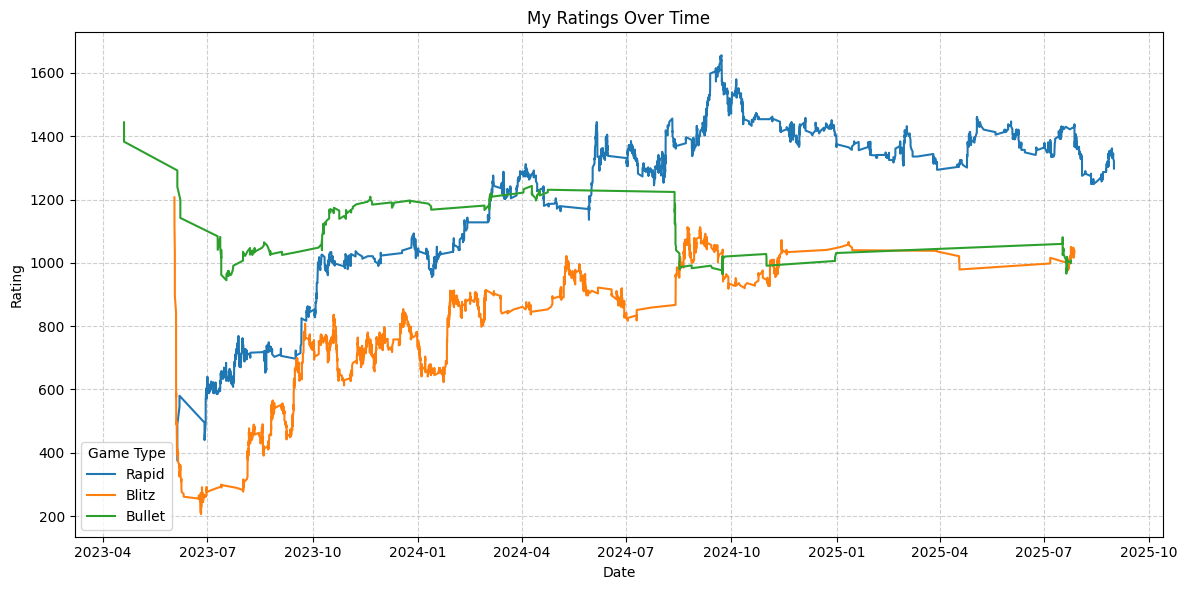

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))

for tclass in ['rapid', 'blitz', 'bullet']:
    subset = pdf[pdf['Time_class'].str.lower() == tclass]
    plt.plot(subset['Date&Time'], subset['My_Rating'], linestyle='-', label=tclass.capitalize())

plt.title("My Ratings Over Time")
plt.xlabel("Date")
plt.ylabel("Rating")
plt.legend(title="Game Type")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


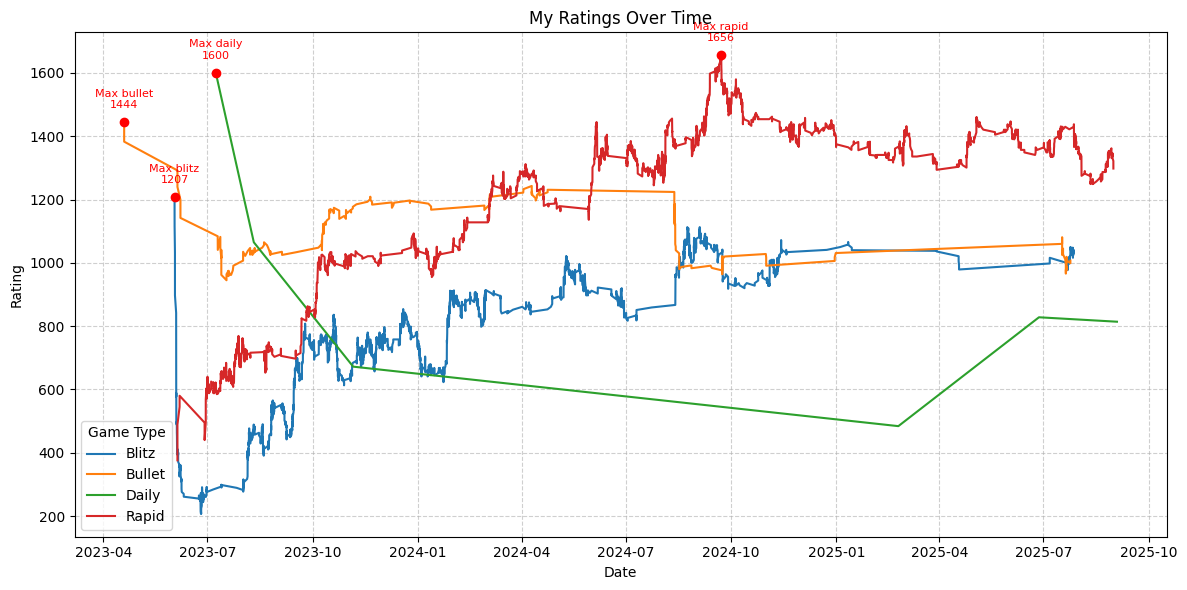

In [48]:
plt.figure(figsize=(12,6))

for tclass, group in pdf.groupby('Time_class'):
    # plot the rating curve
    plt.plot(group['Date&Time'], group['My_Rating'], linestyle='-', label=tclass.capitalize())

    # find max rating row
    idx_max = group['My_Rating'].idxmax()
    max_row = group.loc[idx_max]

    # plot a red point at max rating
    plt.scatter(max_row['Date&Time'], max_row['My_Rating'], color='red', zorder=5)

    # annotate it
    plt.annotate(f"Max {tclass}\n{max_row['My_Rating']}",
                 (max_row['Date&Time'], max_row['My_Rating']),
                 textcoords="offset points", xytext=(0,10), ha='center',
                 color='red', fontsize=8)

plt.title("My Ratings Over Time")
plt.xlabel("Date")
plt.ylabel("Rating")
plt.legend(title="Game Type")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Top 10 most played openings

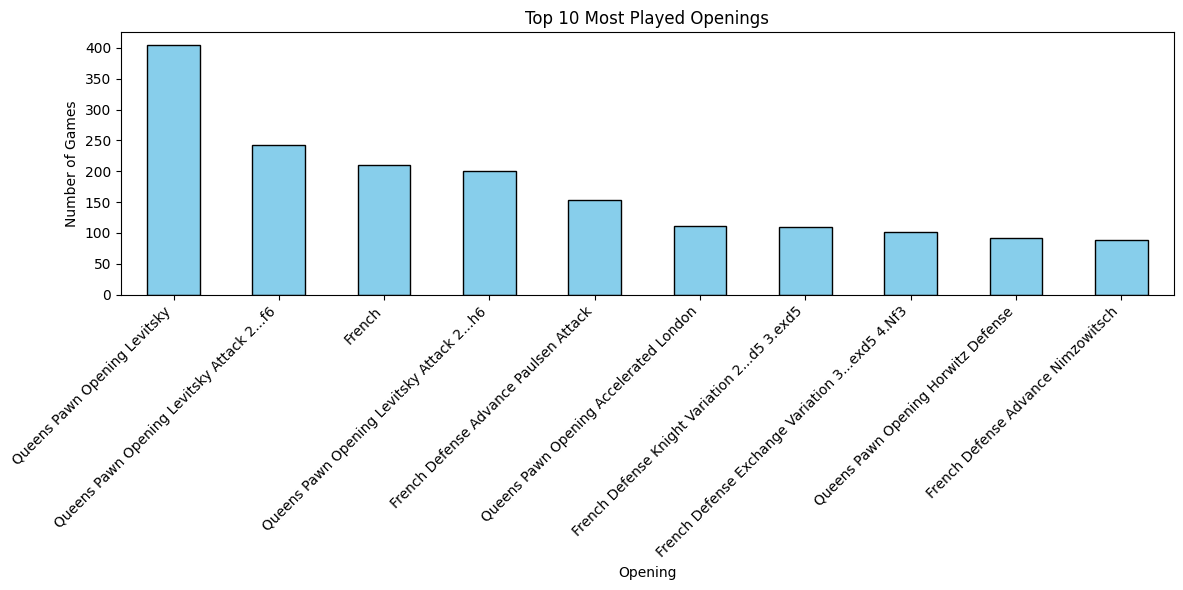

In [49]:

top_openings = pdf['Opening_name'].value_counts().head(10)

plt.figure(figsize=(12,6))
top_openings.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Top 10 Most Played Openings")
plt.xlabel("Opening")
plt.ylabel("Number of Games")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Maping results into categories

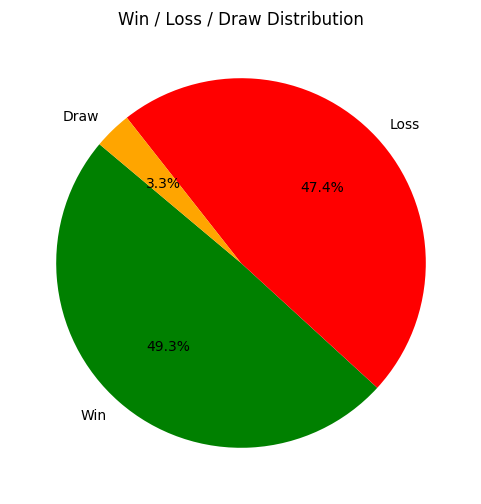

In [50]:
def categorize_result(r):
    if r == "win":
        return "Win"
    elif r in ["stalemate","repetition","agreed","insufficient","timevsinsufficient","50move"]:
        return "Draw"
    else:
        return "Loss"

pdf['Result_Category'] = pdf['My_Result'].map(categorize_result)

# count categories
result_summary = pdf['Result_Category'].value_counts()

plt.figure(figsize=(6,6))
result_summary.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['green','red','orange'])

plt.title("Win / Loss / Draw Distribution")
plt.ylabel("")
plt.show()


# Maping Result in detail

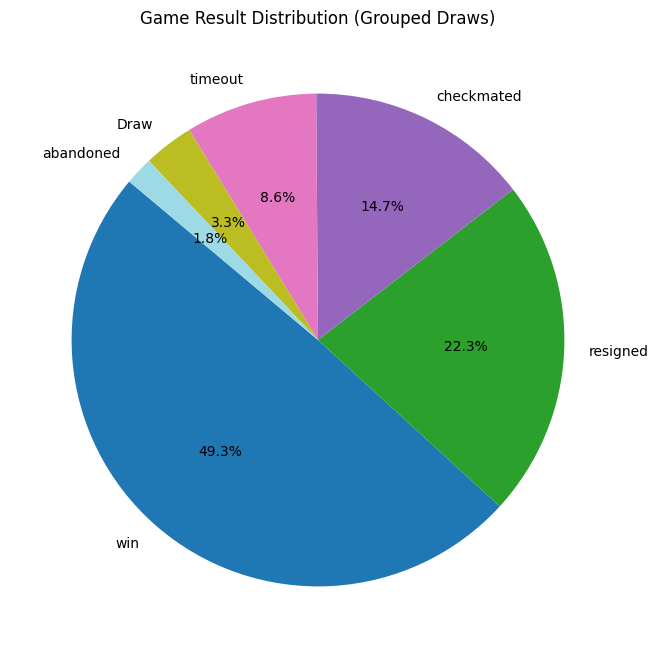

In [52]:

draw_results = ["stalemate", "repetition", "agreed", "insufficient", "timevsinsufficient", "50move"]

# Map results
def categorize_result(r):
    if r in draw_results:
        return "Draw"
    else:
        return r   # keep win, resigned, checkmated, timeout, abandoned, etc.

pdf['Result_Category'] = pdf['My_Result'].map(categorize_result)

# Count grouped results
result_summary = pdf['Result_Category'].value_counts()

# Pie chart
plt.figure(figsize=(8,8))
result_summary.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    cmap='tab20'
)

plt.title("Game Result Distribution (Grouped Draws)")
plt.ylabel("")
plt.show()
